# Data Prep

In [1]:
import sys
sys.path.append('src')

import path
from data import Data
from constants import *
from group_data_split import DataSplitConfig

# Use Rio 3band data
config = DataConfig(DEFAULT_DATA_DIR, BAND3, RIO_REGION)

# Train (60%), Val (10%), Test (20%), Fixed seed
split_config = DataSplitConfig(0.1, 0.2, 1337)

data = Data(config, split_config, batch_size=4, aug_random_seed=1337, augment=True)

# Exclude empty polygons
data.data_filter = lambda df: df.sq_ft > 0

In [2]:
split = data.split_data

total_count = data.df.ImageId.nunique()
train_image_count = split.train_df().ImageId.nunique()
val_image_count = split.val_df.ImageId.nunique()
test_image_count = split.test_df.ImageId.nunique()

print(f'{total_count} Images: {train_image_count} train, {val_image_count} validation, {test_image_count} test')

4310 Images: 3017 train, 431 validation, 862 test


# Train Batch

In [3]:
train_batch = data.train_batch_data(0)

train_batch_image_count = train_batch.df.ImageId.nunique()

print(f'{train_batch_image_count} images per batch (will be doubled because of augment=True)')

2 images per batch (will be doubled because of augment=True)


In [4]:
print(f'{data.train_batch_count()} batches to use entire training set')

1509 batches to use entire training set


Images: (4, 500, 500, 3)
Masks: (4, 500, 500)


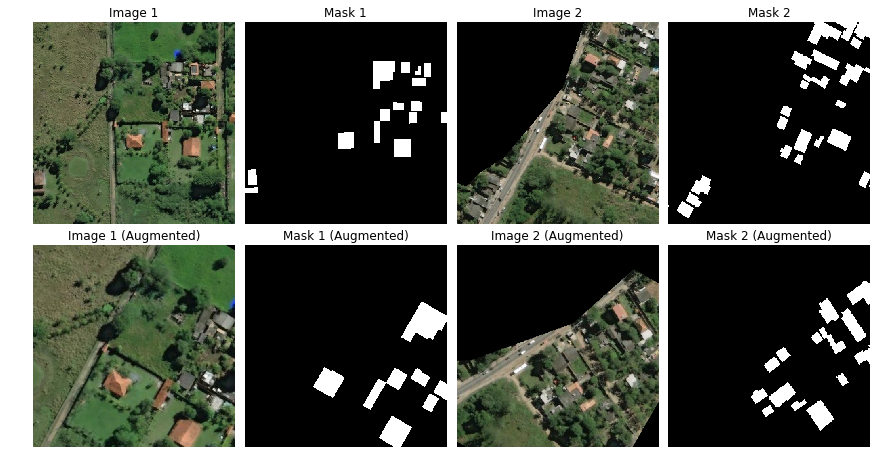

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

images, masks = train_batch.to_nn((500, 500))
combined = list(zip(images, masks))

print(f'Images: {images.shape}')
print(f'Masks: {masks.shape}')

plt.figure(figsize=(15,8))

def plot_image_and_mask(images_and_masks, i, title=True):
    """Total hack to quickly display images and masks"""
    image, mask = images_and_masks[i]
    suffix = ' (Augmented)' if i > 1 else ''
    
    plt.subplot(2, 4, (i * 2) + 1)
    if title: plt.title(f'Image {(i % 2 + 1)}{suffix}')
    plt.axis('off')
    plt.imshow(image)
    
    plt.subplot(2, 4, (i * 2) + 2)
    if title: plt.title(f'Mask {(i % 2 + 1)}{suffix}')
    plt.axis('off')
    plt.imshow(mask, cmap='gray')

[plot_image_and_mask(combined, i) for i in range(4)]

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Train Batch (w/ Filtering & Custom Image Size)

Images: (4, 120, 120, 3)
Masks: (4, 120, 120)


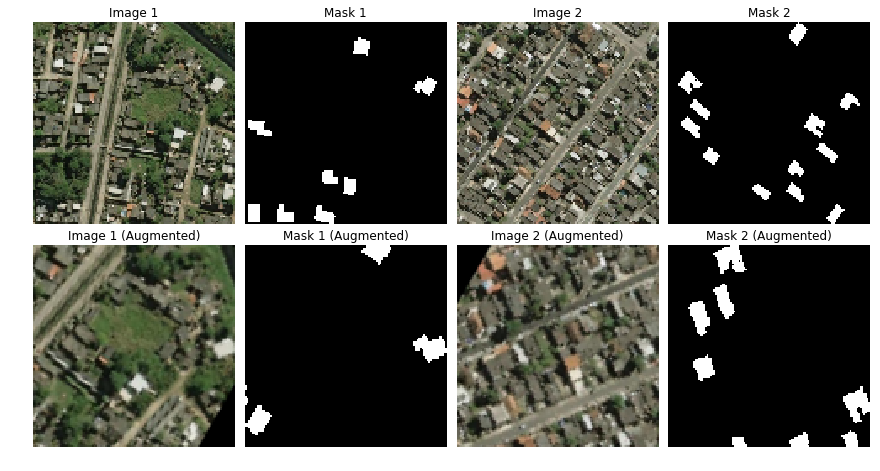

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Only uses masks for buildings > 500 sq.ft.
data.data_filter = lambda df: df.sq_ft > 500

# Produce smaller images
images, masks = data.train_batch_data(0).to_nn((120, 120))

print(f'Images: {images.shape}')
print(f'Masks: {masks.shape}')

# Reset filter to no empty polygons for later code
data.data_filter = lambda df: df.sq_ft > 0

combined = list(zip(images, masks))

plt.figure(figsize=(15,8))
[plot_image_and_mask(combined, i) for i in range(4)]
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# Validation Batch

In [7]:
val_batch = data.val_batch_data(0)

val_batch_image_count = val_batch.df.ImageId.nunique()

print(f'{val_batch_image_count} images per batch (ignores augment=True for validation)')

4 images per batch (ignores augment=True for validation)


In [8]:
print(f'{data.val_batch_count()} batches to use entire validation set')

108 batches to use entire validation set


Images: (4, 500, 500, 3)
Masks: (4, 500, 500)


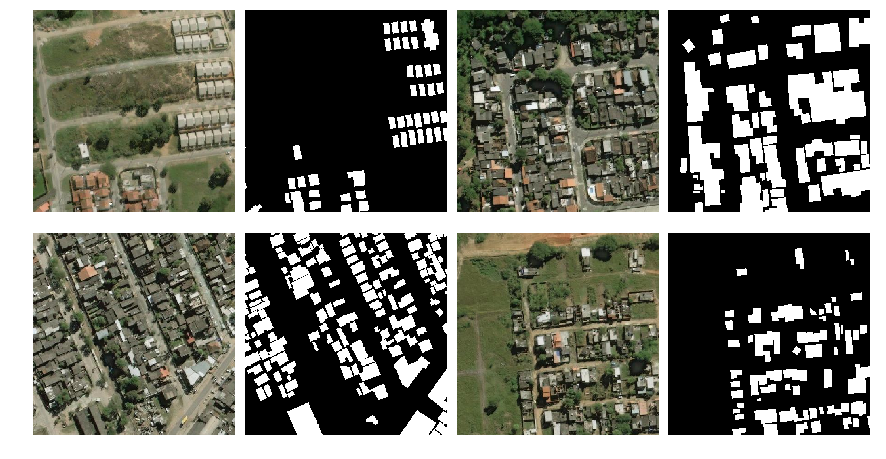

In [9]:
# No randomization occurs in batches here
images, masks = data.val_batch_data(0).to_nn((500, 500))

print(f'Images: {images.shape}')
print(f'Masks: {masks.shape}')

combined = list(zip(images, masks))

plt.figure(figsize=(15,8))
[plot_image_and_mask(combined, i, False) for i in range(4)]
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()